##**Importing all requisite libraries:-**

In [717]:
!pip install catboost
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Loading of data into the DataFrame:-**

In [718]:
train=pd.read_csv(r"train_IxoE5JN.csv")
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [719]:
train

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800
94988,94989,2018-12-31 20:00:00,2461.883600
94989,94990,2018-12-31 21:00:00,2365.994400
94990,94991,2018-12-31 22:00:00,2342.942800


## **Splitting of datetime into seperate columns:-**

In [720]:
test = pd.read_csv(r"test_WudNWDM.csv",parse_dates=['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] =test['datetime'].dt.month
test['day'] =test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [721]:
test.head()

,row_id,datetime,year,month,day,hour
0,94993,2019-01-01 00:00:00,2019,1,1,0
1,94994,2019-01-01 01:00:00,2019,1,1,1
2,94995,2019-01-01 02:00:00,2019,1,1,2
3,94996,2019-01-01 03:00:00,2019,1,1,3
4,94997,2019-01-01 04:00:00,2019,1,1,4


In [722]:
test.isna().sum()

row_id      0
datetime    0
year        0
month       0
day         0
hour        0
dtype: int64

In [723]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
 2   year      26304 non-null  int64         
 3   month     26304 non-null  int64         
 4   day       26304 non-null  int64         
 5   hour      26304 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.2 MB


In [724]:
test

,row_id,datetime,year,month,day,hour
0,94993,2019-01-01 00:00:00,2019,1,1,0
1,94994,2019-01-01 01:00:00,2019,1,1,1
2,94995,2019-01-01 02:00:00,2019,1,1,2
3,94996,2019-01-01 03:00:00,2019,1,1,3
4,94997,2019-01-01 04:00:00,2019,1,1,4
...,...,...,...,...,...,...
26299,121292,2021-12-31 19:00:00,2021,12,31,19
26300,121293,2021-12-31 20:00:00,2021,12,31,20
26301,121294,2021-12-31 21:00:00,2021,12,31,21
26302,121295,2021-12-31 22:00:00,2021,12,31,22


In [725]:
train = pd.read_csv(r"train_IxoE5JN.csv",parse_dates=['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [726]:
train.head()

,row_id,datetime,energy,year,month,day,hour
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,0
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,2
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,3
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,4


In [727]:
train.describe()

,row_id,energy,year,month,day,hour
count,94992.000000,93092.000000,94992.000000,94992.000000,94992.000000,94992.000000
mean,47496.500000,1702.995014,2013.075038,6.599040,15.733704,11.500000
std,27421.972723,369.322103,3.125436,3.417591,8.802197,6.922223
min,1.000000,866.388600,2008.000000,1.000000,1.000000,0.000000
25%,23748.750000,1431.541100,2010.000000,4.000000,8.000000,5.750000
50%,47496.500000,1654.465800,2013.000000,7.000000,16.000000,11.500000
75%,71244.250000,1935.993450,2016.000000,10.000000,23.000000,17.250000
max,94992.000000,3374.399600,2018.000000,12.000000,31.000000,23.000000


## **Data Cleaning:-**

In [728]:
train.isna().sum()

row_id         0
datetime       0
energy      1900
year           0
month          0
day            0
hour           0
dtype: int64

In [729]:
df=train.copy()

##**Removing duplicate feature:**-

In [730]:
df=df.drop(['datetime'], axis=1)

## **Arranging in proper sequnence i.e. target column at last:**-

In [731]:
df1=df.iloc[:,0:1]
df2=df.iloc[:,2:6]
df3=df.iloc[:,1:2]
res=pd.concat([df1,df2,df3], axis=1)

In [732]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   year    94992 non-null  int64  
 2   month   94992 non-null  int64  
 3   day     94992 non-null  int64  
 4   hour    94992 non-null  int64  
 5   energy  93092 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


##**Checking null values in features:**-

In [734]:
res.isna().sum()

row_id       0
year         0
month        0
day          0
hour         0
energy    1900
dtype: int64

##**Iterative Imputer:**-

In [735]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

df_mice =  res.filter(['row_id','year','month','day','hour','energy'], axis=1).copy()


# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=11), n_nearest_features=None,max_iter=1000, tol=0.0001,initial_strategy='mean', imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

In [736]:
df_mice_imputed

,row_id,year,month,day,hour,energy
0,1.0,2008.0,3.0,1.0,0.0,1259.985563
1,2.0,2008.0,3.0,1.0,1.0,1095.541500
2,3.0,2008.0,3.0,1.0,2.0,1056.247500
3,4.0,2008.0,3.0,1.0,3.0,1034.742000
4,5.0,2008.0,3.0,1.0,4.0,1026.334500
...,...,...,...,...,...,...
94987,94988.0,2018.0,12.0,31.0,19.0,2528.446800
94988,94989.0,2018.0,12.0,31.0,20.0,2461.883600
94989,94990.0,2018.0,12.0,31.0,21.0,2365.994400
94990,94991.0,2018.0,12.0,31.0,22.0,2342.942800


##**Converting dd-mm-yy-hh in integer format from float as per our requirement:**-

In [737]:
df_mice_imputed['year'] = df_mice_imputed['year'].astype(int)
df_mice_imputed['month'] = df_mice_imputed['month'].astype(int)
df_mice_imputed['day'] = df_mice_imputed['day'].astype(int)
df_mice_imputed['hour'] = df_mice_imputed['hour'].astype(int)
df_mice_imputed['row_id'] = df_mice_imputed['row_id'].astype(int)

In [738]:
df_mice_imputed.isna().sum()

row_id    0
year      0
month     0
day       0
hour      0
energy    0
dtype: int64

##**Making a duplicate copy:**-

In [741]:
res=df_mice_imputed.copy()

In [742]:
res

,row_id,year,month,day,hour,energy
0,1,2008,3,1,0,1259.985563
1,2,2008,3,1,1,1095.541500
2,3,2008,3,1,2,1056.247500
3,4,2008,3,1,3,1034.742000
4,5,2008,3,1,4,1026.334500
...,...,...,...,...,...,...
94987,94988,2018,12,31,19,2528.446800
94988,94989,2018,12,31,20,2461.883600
94989,94990,2018,12,31,21,2365.994400
94990,94991,2018,12,31,22,2342.942800


##**Cleaned data with zero null values in each feature:**-

In [743]:
res.isna().sum()

row_id    0
year      0
month     0
day       0
hour      0
energy    0
dtype: int64

## **Train-Test Split:-**

In [744]:
X = res.drop(['energy'], axis=1)
y = res['energy']#target variable

In [745]:
X.isna().sum()

row_id    0
year      0
month     0
day       0
hour      0
dtype: int64

In [746]:
type(X)

pandas.core.frame.DataFrame

In [747]:
y.isna().sum()

0

In [748]:
type(y)

pandas.core.series.Series

In [749]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.155, shuffle=True)

In [750]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((80268, 5), (14724, 5), (80268,), (14724,))

# **Different Machine Learning Models:**-

# **1. Linear Regression:**-

In [751]:
model = LinearRegression()
model.fit(X_train,y_train)

print("Test R^2 Score: {:.5f}".format(model.score(X_val, y_val)))

Test R^2 Score: 0.49637


# **2. Random Forest:**-

In [752]:
regr = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 101)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=4, random_state=101)

In [753]:
predictions = regr.predict(X_val)

In [754]:
mae = mean_absolute_error(y_val.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_val.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_val.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 5))

Mean Absolute Error: 172.0
Mean Squared Error: 48915.37
R-squared scores: 0.64


# **3. CatBoost:**-

In [755]:
model2=CatBoostRegressor()
model2.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(model2.score(X_val, y_val)))


Learning rate set to 0.081865
0:	learn: 349.6897506	total: 19ms	remaining: 18.9s
1:	learn: 332.7893807	total: 30.7ms	remaining: 15.3s
2:	learn: 317.9299034	total: 40.7ms	remaining: 13.5s
3:	learn: 305.4999928	total: 51.9ms	remaining: 12.9s
4:	learn: 292.9967818	total: 62.6ms	remaining: 12.4s
5:	learn: 282.2748409	total: 73ms	remaining: 12.1s
6:	learn: 272.5570478	total: 83.7ms	remaining: 11.9s
7:	learn: 263.4173719	total: 94.6ms	remaining: 11.7s
8:	learn: 255.6080426	total: 106ms	remaining: 11.6s
9:	learn: 248.2663568	total: 117ms	remaining: 11.6s
10:	learn: 242.4727072	total: 128ms	remaining: 11.5s
11:	learn: 236.9341513	total: 138ms	remaining: 11.4s
12:	learn: 232.1766104	total: 148ms	remaining: 11.2s
13:	learn: 227.4934063	total: 158ms	remaining: 11.1s
14:	learn: 222.9361773	total: 174ms	remaining: 11.4s
15:	learn: 219.2362252	total: 185ms	remaining: 11.4s
16:	learn: 215.8826713	total: 195ms	remaining: 11.3s
17:	learn: 212.7838855	total: 206ms	remaining: 11.2s
18:	learn: 210.4120881

# **4. XGBoost:**-

In [756]:
def XGBoost(X_train,X_val,y_train,y_test):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_val,label=y_test)
    return xgb.train(params={'objective':'reg:squarederror','eval_metric':'rmse', 'max_depth':7, 'colsample_bytree':0.9, 'gamma':1}
                    ,dtrain=dtrain,num_boost_round=36, 
                    early_stopping_rounds=5,evals=[(dtest,'test')])

In [757]:
xgb_model = XGBoost(X_train, X_val, y_train, y_val)

[0]	test-rmse:1230.87
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:871.165
[2]	test-rmse:625.551
[3]	test-rmse:453.189
[4]	test-rmse:336.978
[5]	test-rmse:260.692
[6]	test-rmse:212.512
[7]	test-rmse:182.898
[8]	test-rmse:166.045
[9]	test-rmse:155.701
[10]	test-rmse:150.112
[11]	test-rmse:145.207
[12]	test-rmse:142.768
[13]	test-rmse:140.569
[14]	test-rmse:139.272
[15]	test-rmse:137.662
[16]	test-rmse:136.857
[17]	test-rmse:136.4
[18]	test-rmse:135.083
[19]	test-rmse:134.222
[20]	test-rmse:132.638
[21]	test-rmse:131.488
[22]	test-rmse:131.314
[23]	test-rmse:130.637
[24]	test-rmse:130.115
[25]	test-rmse:129.073
[26]	test-rmse:127.712
[27]	test-rmse:126.572
[28]	test-rmse:125.939
[29]	test-rmse:125.425
[30]	test-rmse:125.293
[31]	test-rmse:124.398
[32]	test-rmse:124.021
[33]	test-rmse:123.464
[34]	test-rmse:122.282
[35]	test-rmse:122.111


In [758]:
y_train_pred = xgb_model.predict(xgb.DMatrix(X_train), ntree_limit = xgb_model.best_iteration)
y_val_pred = xgb_model.predict(xgb.DMatrix(X_val), ntree_limit = xgb_model.best_iteration)

In [759]:
from sklearn.metrics import mean_squared_error as mse

## **Best iteration values:**-

In [760]:
print("Train set error: ", np.sqrt(mse(y_train, y_train_pred)))
print("Validation set error: ", np.sqrt(mse(y_val, y_val_pred)))

Train set error:  120.08435672777101
Validation set error:  122.28164973120431


##**Decision Tree:**-

In [761]:
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
dtc=DecisionTreeRegressor(random_state=2022)
dtc.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(dtc.score(X_val, y_val)))

Test R^2 Score: 0.96023


##***Out of these XGBoost outperformed others, with same number of iterations:***-

##**Prediction from test data from best(XGBoost model):**-

In [762]:
test_key = test['datetime']
x_pred = test.drop(columns=['datetime'])

In [763]:
x_pred

,row_id,year,month,day,hour
0,94993,2019,1,1,0
1,94994,2019,1,1,1
2,94995,2019,1,1,2
3,94996,2019,1,1,3
4,94997,2019,1,1,4
...,...,...,...,...,...
26299,121292,2021,12,31,19
26300,121293,2021,12,31,20
26301,121294,2021,12,31,21
26302,121295,2021,12,31,22


In [764]:
xgb_model

In [765]:
prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [766]:
prediction_pr

array([1859.1654, 1705.5752, 1621.508 , ..., 2373.8132, 2322.1497,
       2211.3467], dtype=float32)

In [767]:
prediction_1 = prediction_pr.round(4)

In [768]:
prediction_1

array([1859.1654, 1705.5752, 1621.508 , ..., 2373.8132, 2322.1497,
       2211.3467], dtype=float32)

In [769]:
prediction_1.shape

(26304,)

## **Submission of requisite file:**-

In [770]:
submission = pd.read_csv(r"sample_submission_jn0a7vR.csv")

In [771]:
submission['energy']=prediction_1

In [772]:
submission.head(20)

,row_id,energy
0,94993,1859.165405
1,94994,1705.575195
2,94995,1621.508057
3,94996,1555.637939
4,94997,1532.659424
5,94998,1532.659424
6,94999,1516.034302
7,95000,1629.926392
8,95001,1690.023560
9,95002,1778.678833


In [773]:
submission.to_csv("submission.csv",index=False)

## **XGboost Feature Importance(Best Model):**-

Plotting Feature Importance


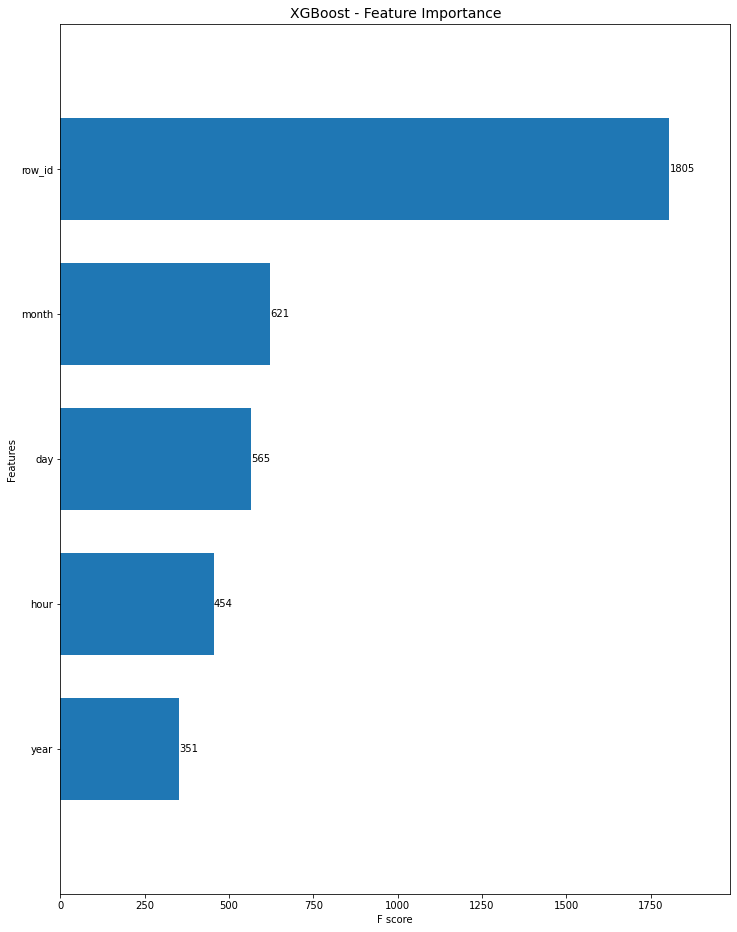

In [774]:
print('Plotting Feature Importance')
fig, ax = plt.subplots(figsize=(12,16))
xgb.plot_importance(xgb_model, height=0.7, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=14)
plt.show()

#**Here row_id can't be neglected as it has maximum weightage from this curve:**-